# Suicide Analysis in India
 Dataset used: [Kaggle](https://www.kaggle.com/datasets/rajanand/suicides-in-india)<br>

### Importing the dependencies

In [54]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('Suicides in India 2001-2012'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading Data

In [55]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


### Understanding and Cleaning the data

In [56]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [57]:
df.drop_duplicates()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [58]:
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [59]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [60]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [61]:
df.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [62]:
df.Type.unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [63]:
df[df['Type']=='Bankruptcy or Sudden change in Economic']

,State,Year,Type_code,Type,Gender,Age_group,Total
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
48,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Male,0-14,0
56,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,15-29,0
84,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Male,15-29,0
118,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,30-44,0
...,...,...,...,...,...,...,...
237100,West Bengal,2012,Causes,Bankruptcy or Sudden change in Economic,Male,30-44,0
237140,West Bengal,2012,Causes,Bankruptcy or Sudden change in Economic,Female,45-59,0
237156,West Bengal,2012,Causes,Bankruptcy or Sudden change in Economic,Male,45-59,0
237183,West Bengal,2012,Causes,Bankruptcy or Sudden change in Economic,Female,60+,0


In [64]:
df['Type'] = df['Type'].replace(['Bankruptcy or Sudden change in Economic'],'Bankruptcy or Sudden change in Economic Status')
df=df.drop(df[(df.Type =='By Other means')|(df.Type=='Other Causes (Please Specity)')| (df.Type=='Others (Please Specify)')|(df.Type=='Causes Not known')].index)
df = df.drop(df[df['Total'] == 0].index)

In [65]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [66]:
df.Age_group.unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [67]:
df[df['Age_group']=='0-100+']

,State,Year,Type_code,Type,Gender,Age_group,Total
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [68]:
df_wa = df[df['Age_group']!='0-100+']
df_wa

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means (please specify),Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


<AxesSubplot:xlabel='Year'>

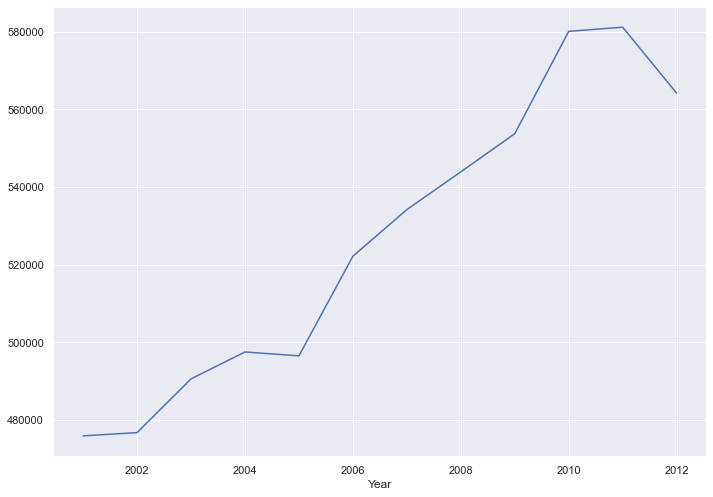

In [69]:
df.groupby("Year")["Total"].sum().plot(kind="line")

In [70]:
df = df[(df["State"]!="Total (States)")&(df["State"]!="Total (Uts)")&(df["State"]!="Total (All India)") ]
df["State"].value_counts()

Andhra Pradesh       4696
Karnataka            4625
Tamil Nadu           4582
Madhya Pradesh       4539
Maharashtra          4488
Uttar Pradesh        4472
Gujarat              4374
West Bengal          4152
Kerala               4034
Chhattisgarh         3881
Rajasthan            3840
Odisha               3690
Assam                3393
Haryana              3356
Delhi (Ut)           2890
Jharkhand            2781
Bihar                2672
Punjab               2607
Himachal Pradesh     2252
Uttarakhand          2116
Tripura              2043
Goa                  1902
Puducherry           1873
Jammu & Kashmir      1824
Sikkim               1189
A & N Islands        1090
Meghalaya             953
Chandigarh            945
Arunachal Pradesh     879
D & N Haveli          824
Mizoram               584
Manipur               491
Nagaland              456
Daman & Diu           456
Lakshadweep            42
Name: State, dtype: int64

### Analysing Data 
State wise

Text(0.5, 1.0, 'Suicide stat State-wise')

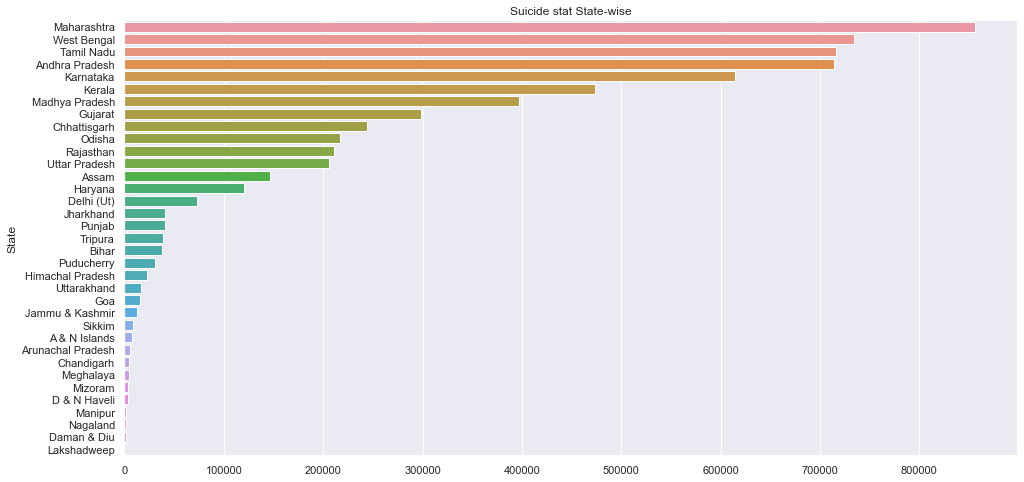

In [71]:
plt.figure(figsize=(16,8))
df_st = df.groupby('State').sum().Total.sort_values(ascending=False)
sns.barplot(y=df_st.index,x=df_st.values,orient='h')
plt.ylabel('State')
plt.title('Suicide stat State-wise')

Inference: It can be observed from the above graph that the top states are Maharashtra, West Bengal, Tamil Nadu, Andhra Pradesh and Karnataka.

Building a table to show the number of suicides in every state yearwise.

In [72]:
x = df.groupby(['State','Year'])['Total'].sum()
y = pd.DataFrame(x).reset_index()
y = y.pivot(index='State',columns='Year')
y['sum'] = y.sum(axis=1)
yearly_total = y.sum(axis=0)
y = y.sort_values('sum',ascending=False)
y = y[2:14]
y = y/10
y = y.drop('sum',axis=1)
y

Total                                                  \
Year              2001    2002    2003    2004    2005    2006    2007   
State                                                                    
Tamil Nadu      4996.3  4946.2  5343.5  5752.7  5342.0  5453.0  6072.7   
Andhra Pradesh  4677.5  5097.1  5033.9  5958.9  5874.0  5832.9  6447.5   
Karnataka       5157.6  5159.5  5188.8  4932.9  4741.9  4987.8  5081.4   
Kerala          4216.1  4327.6  4054.0  3865.6  3987.5  4006.9  3994.3   
Madhya Pradesh  2998.8  3090.8  3044.7  3040.4  2411.8  2830.9  2777.7   
Gujarat         2247.5  2138.0  2082.1  2161.2  2161.4  2263.4  2509.7   
Chhattisgarh    1704.3  1595.3  1585.2  1828.2  2025.2  1892.7  1999.9   
Odisha          1688.7  1734.1  1817.0  1717.1  1719.7  1627.4  1749.9   
Rajasthan       1370.4  1355.7  1579.4  1586.8  1693.8  1723.0  1817.1   
Uttar Pradesh   1613.1  1809.5  1634.6  1597.9  1527.0  1352.9  1699.2   
Assam           1133.5  1063.5  1076.5  1222.4  1206.4  1295.3  1272.8   
Haryana          841.3   864.6   939.7   858.7   835.3   982.3  1023.5   

                                                        
Year              2008    2009    2010    2011    2012  
State                                                   
Tamil Nadu      6398.8  6306.5  7209.0  6808.1  6999.3  
Andhra Pradesh  6298.6  6445.8  6896.5  6589.1  6279.1  
Karnataka       5008.3  5052.4  5342.8  5340.0  5405.2  
Kerala          3807.7  3903.0  3822.0  3648.1  3729.1  
Madhya Pradesh  3423.6  3888.3  3883.3  4029.7  4334.6  
Gujarat         2759.8  2807.6  2728.9  2835.9  3114.6  
Chhattisgarh    2120.3  2425.7  2578.2  2555.5  2137.1  
Odisha          1983.6  1761.5  1733.6  2108.6  2059.0  
Rajasthan       2114.0  2120.5  2004.2  1783.0  1953.9  
Uttar Pradesh   1797.6  1817.3  1628.7  2118.3  2000.4  
Assam           1252.9  1266.8  1281.1  1180.5  1372.7  
Haryana         1060.3  1038.9  1154.5  1275.4  1124.7

Now plotting the heatmap to analyze the trends in the top states in each year.

<AxesSubplot:xlabel='None-Year', ylabel='State'>

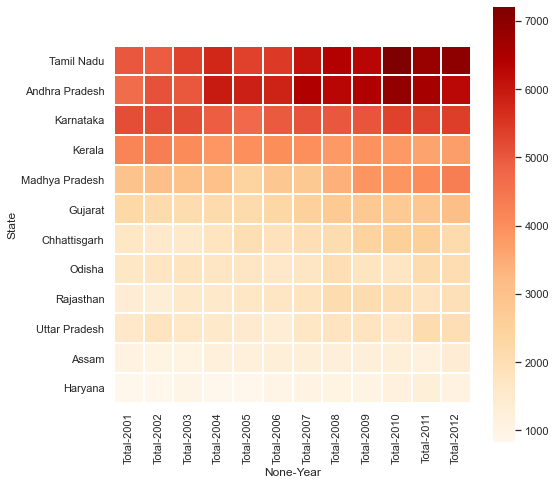

In [73]:
plt.figure(figsize=(8,8))
sns.heatmap(y,linewidth=1,cmap='OrRd',square=True)

Age group wise


Text(0.5, 1.0, 'Suicides per Age Group')

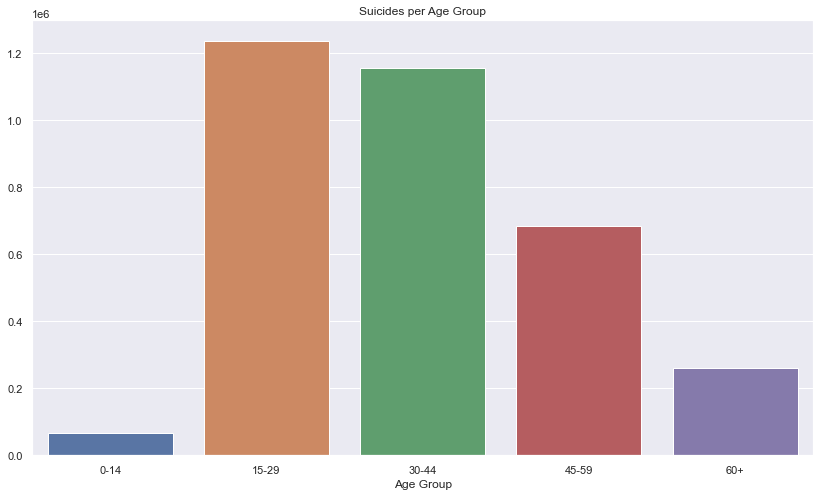

In [74]:
plt.figure(figsize=(14,8))
df_ag = df_wa.groupby('Age_group').sum().Total
sns.barplot(x=df_ag.index,y=df_ag.values)
plt.xlabel('Age Group')
plt.title('Suicides per Age Group')

Inference: Max suicides are in age 15 to 44

Text(0.5, 1.0, 'Suicides per Age Group')

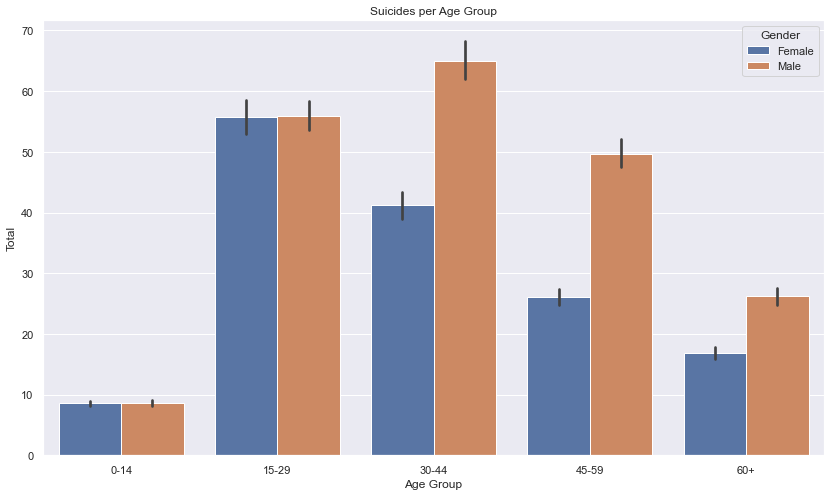

In [75]:
plt.figure(figsize=(14,8))
sns.barplot(x=df_wa.Age_group,y=df_wa.Total,hue=df.Gender)
plt.xlabel('Age Group')
plt.title('Suicides per Age Group')

Inference: Suicide in males is more than females in almost every age group.


Year Wise

Text(0.5, 1.0, 'Suicides per Year')

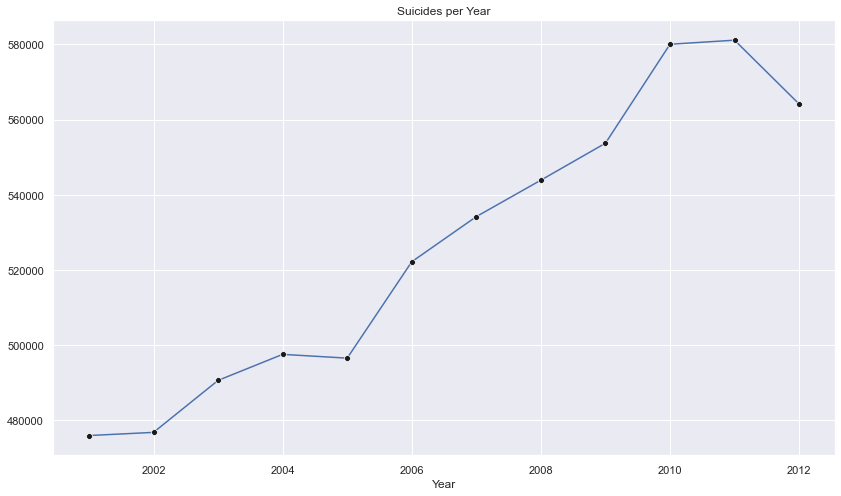

In [76]:
plt.figure(figsize=(14,8))
df_yr = df.groupby('Year').sum().Total
sns.lineplot(x=df_yr.index,y=df_yr.values,marker='o',markerfacecolor='k')
plt.xlabel('Year')
plt.title('Suicides per Year')

Inference: We can see that there is a significant slope in the graph from the years 2005-2006 and further in the years 2009-2010.

Now, we will try and explore and visualize the different factors - We will be exploring 5 categories: 

1.   Causes
2.   Means Adopted
1.   Professional Profile
2.   Educational Status
1.  Social Status

Type Wise

Text(0.5, 1.0, 'Suicide vs State')

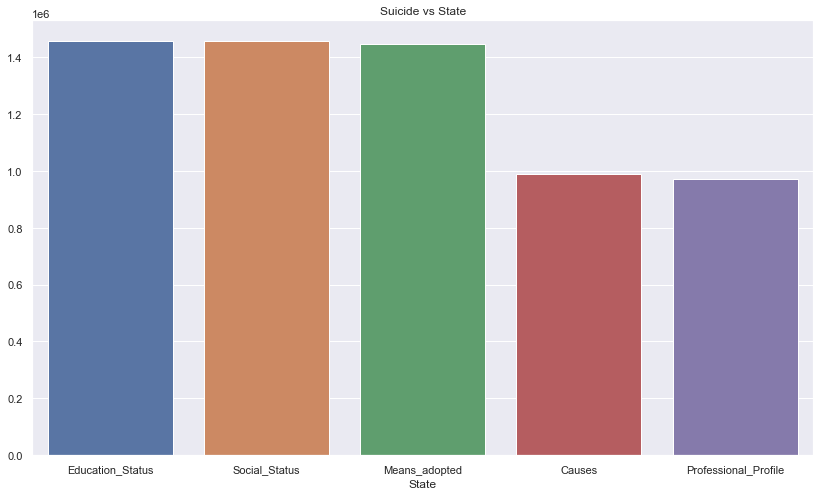

In [77]:

plt.figure(figsize=(14,8))
df_tc = df.groupby('Type_code').sum().Total
df_tc = df_tc.sort_values(ascending=False)
sns.barplot(x=df_tc.index,y=df_tc.values)
plt.xlabel('State')
plt.title('Suicide vs State')

1. Social status

Text(0.5, 1.0, 'Suicide vs Social Status')

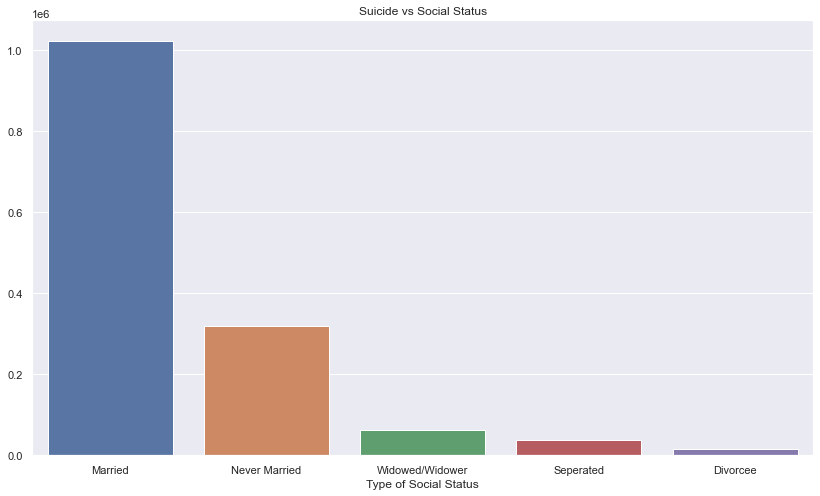

In [78]:
df_ss=df[df['Type_code']=='Social_Status']
df_ss_tp = df_ss.groupby('Type').sum().Total
df_ss_tp = df_ss_tp.sort_values(ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(x=df_ss_tp.index,y=df_ss_tp.values)
plt.xlabel('Type of Social Status')
plt.title('Suicide vs Social Status')

Inference: The above graph shows the marital status of the people who committed suicide.

2. Professional profile

Text(0.5, 1.0, 'Suicide vs Professional Profile')

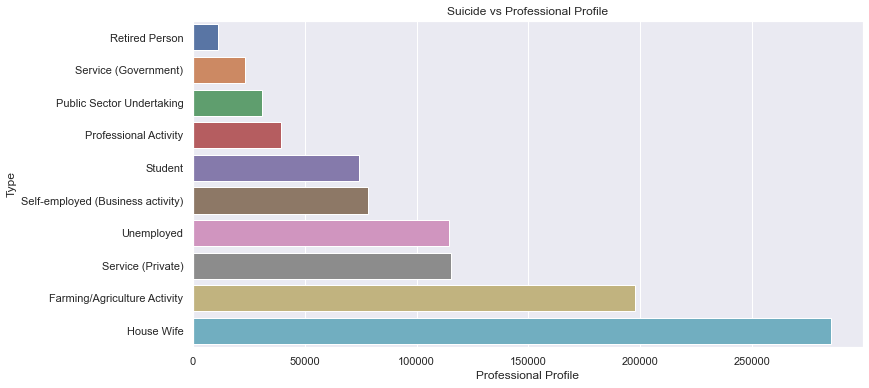

In [79]:
df_pp=df[df['Type_code']=='Professional_Profile']
df_pp_tp = df_pp.groupby('Type').sum().Total
df_pp_tp = df_pp_tp.sort_values(ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(y=df_pp_tp.index,x=df_pp_tp.values,orient='h')
plt.xlabel('Professional Profile')
plt.title('Suicide vs Professional Profile')

Inference: From this graph, we can observe which occupation people are committing more number of suicides. 

In [80]:
df_pp_housewife = df_pp[df_pp['Type']=='House Wife']
df_pp_housewife_s=df_pp_housewife.groupby('State').sum().Total.sort_values(ascending=False)
df_pp_housewife_s[:5]

State
Maharashtra       42059
West Bengal       36253
Tamil Nadu        28165
Andhra Pradesh    27634
Madhya Pradesh    26724
Name: Total, dtype: int64

In [81]:
df_pp_farmer = df_pp[df_pp['Type']=='Farming/Agriculture Activity']
df_pp_farmer_s=df_pp_farmer.groupby('State').sum().Total.sort_values(ascending=False)
df_pp_farmer_s[:5]

State
Maharashtra       44769
Andhra Pradesh    26587
Karnataka         25803
Madhya Pradesh    16190
Chhattisgarh      14344
Name: Total, dtype: int64

3. Education Status

Text(0.5, 1.0, 'Suicide vs Education Status')

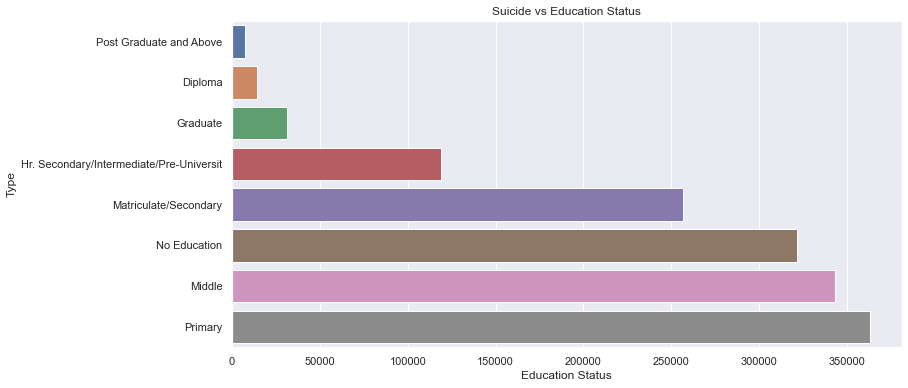

In [82]:
df_es=df[df['Type_code']=='Education_Status']
df_es_tp = df_es.groupby('Type').sum().Total
df_es_tp = df_es_tp.sort_values(ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(y=df_es_tp.index,x=df_es_tp.values,orient='h')
plt.xlabel('Education Status')
plt.title('Suicide vs Education Status')

Inference: This graph gives inference about the educational qualification of the people who committed suicide.

4. Causes

Text(0.5, 1.0, 'Suicide vs Causes')

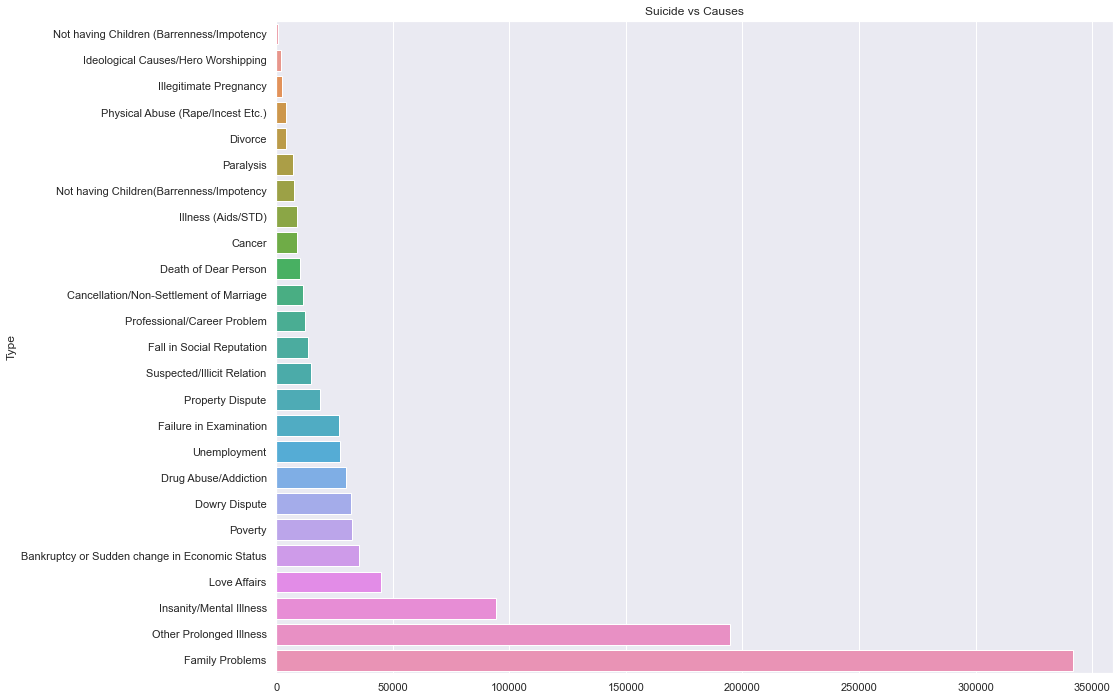

In [83]:
df_cs=df[df['Type_code']=='Causes']
df_cs_tp = df_cs.groupby('Type').sum().Total
df_cs_tp = df_cs_tp.sort_values(ascending=True)
plt.figure(figsize=(15,12))
sns.barplot(y=df_cs_tp.index,x=df_cs_tp.values,orient='h')
plt.title('Suicide vs Causes')

Inference: From the above graph, we can clearly see the top reasons for suicide. Family problems appear to be the most frequent reason for suicide.

5. Means adopted

Text(0.5, 1.0, 'Suicide vs Education Status')

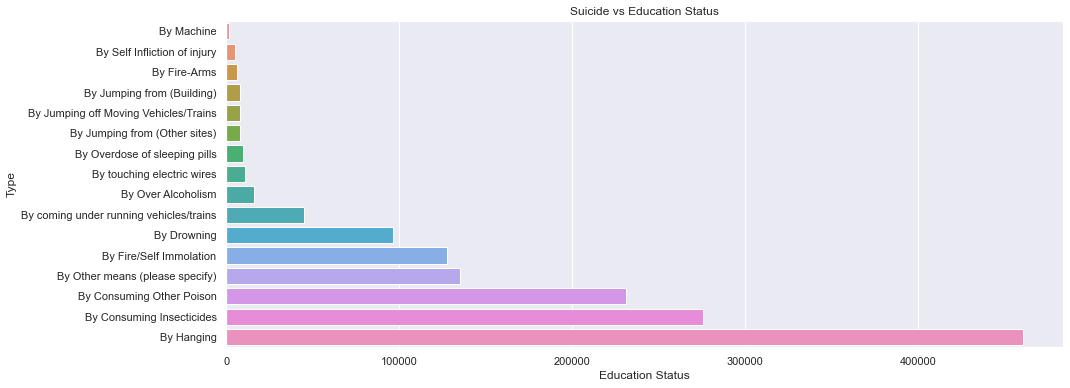

In [84]:
df_ma=df[df['Type_code']=='Means_adopted']
df_ma_tp = df_ma.groupby('Type').sum().Total
df_ma_tp = df_ma_tp.sort_values(ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(y=df_ma_tp.index,x=df_ma_tp.values,orient='h')
plt.xlabel('Education Status')
plt.title('Suicide vs Education Status')

,cause,count
0,Love Affairs,45039
1,Other Prolonged Illness,194565
2,Failure in Examination,27005
3,Family Problems,341952
4,Insanity/Mental Illness,94229
...,...,...
59,By Over Alcoholism,15973
60,By Jumping from (Building),7871
61,By Self Infliction of injury,5093
62,By Machine,1661


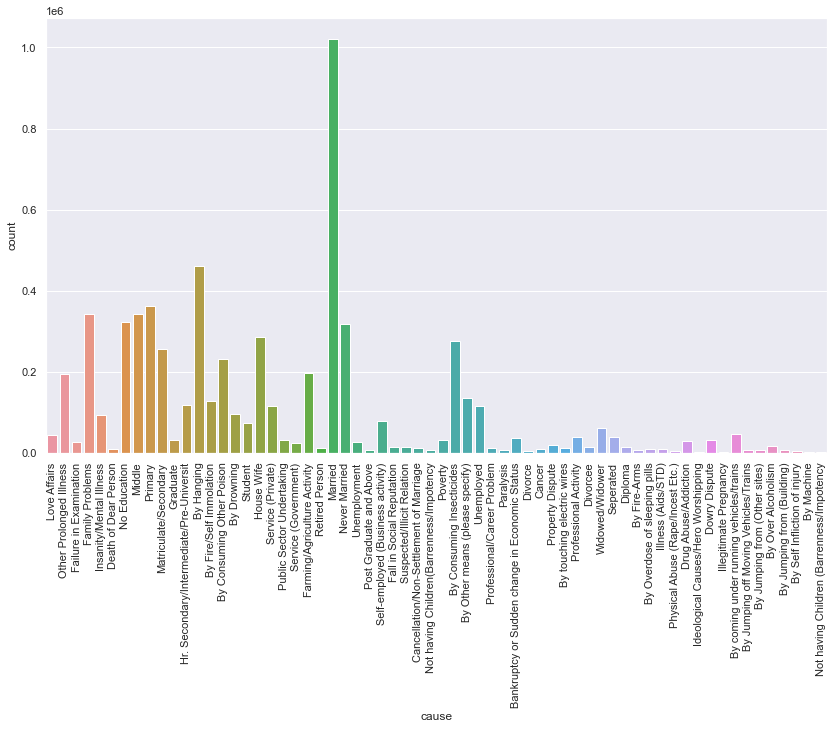

In [85]:
def cause_wise(cs):
    sum=df[df["Type"]==cs]['Total'].sum()
    return sum

causes=df["Type"].unique()
reason=[]

for cs in causes:
    #dict[age]=Age_group(age)
    reason.append(cause_wise(cs))

#age=pd.DataFrame.from_dict(dict, orient='index')
reason=pd.DataFrame({"cause":causes,"count":reason})
fig_dims = (14, 8)

fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "cause", y = "count", ax=ax, data=reason)
#sns.catplot(x="state", y="count", data=state, kind="bar")
plt.xticks(rotation=90)
reason

Change in number of suicide for each age group

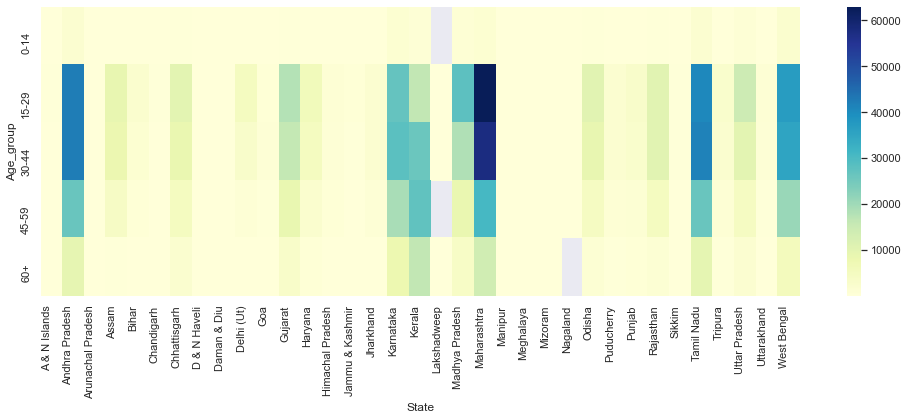

In [86]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()


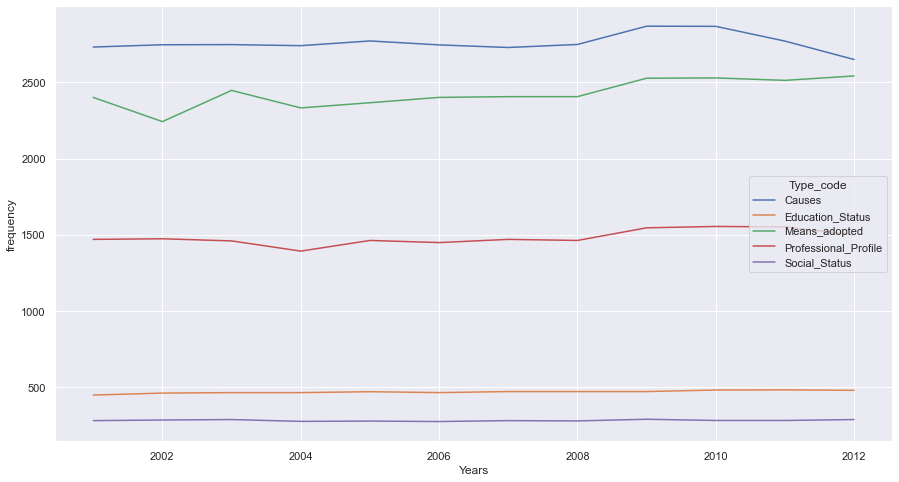

In [87]:
pd.crosstab(df.Year,df.Type_code).plot(stacked=False,figsize=(15,8))
plt.xlabel("Years")
plt.ylabel("frequency")
plt.show()

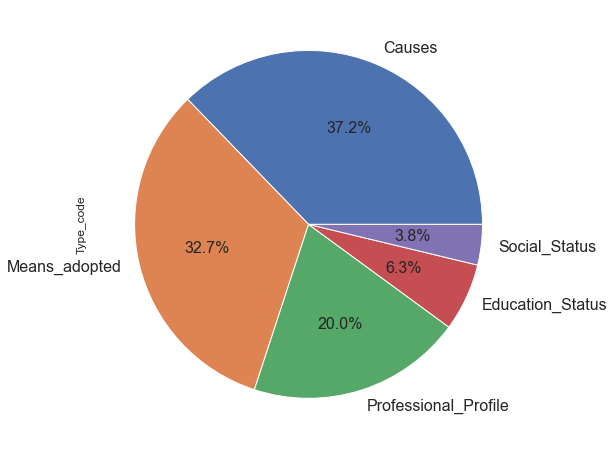

In [88]:
plt.figure(figsize=(15,8))
df['Type_code'].value_counts().plot.pie(autopct="%1.1f%%",textprops={"fontsize" : 16})
plt.show()

Frequency of Suicides in Particular States wrt Years

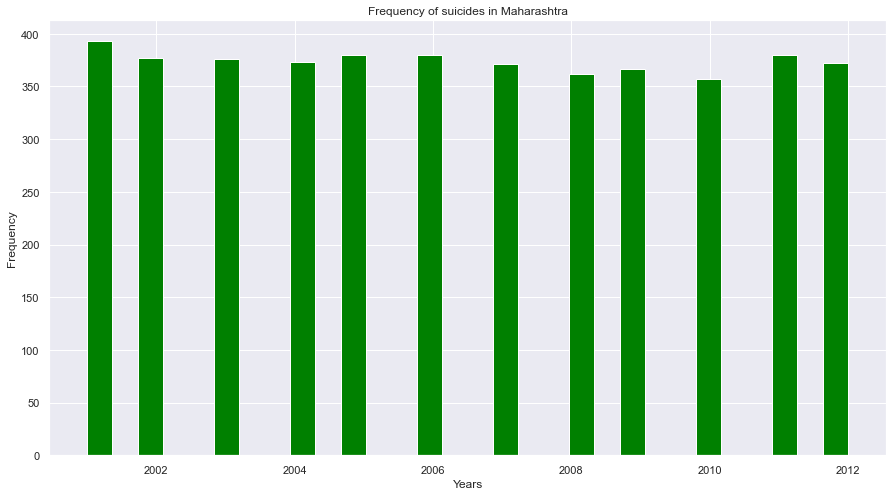

In [89]:
states=df.groupby('State')
maha=states.get_group('Maharashtra')

maha.Year.plot(kind='hist',bins=30,figsize=(15,8),color='green')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of suicides in Maharashtra')
plt.show()

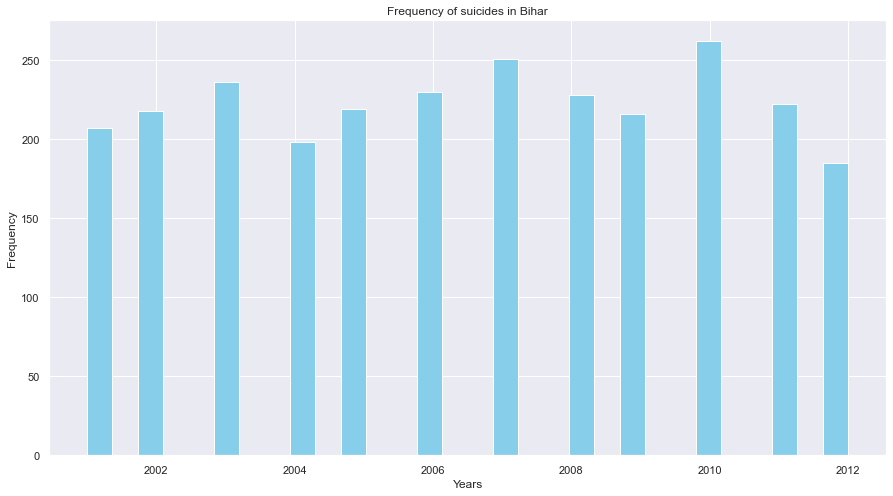

In [90]:
states=df.groupby('State')
bih=states.get_group('Bihar')

bih.Year.plot(kind='hist',bins=30,figsize=(15,8),color="skyblue")
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of suicides in Bihar')
plt.show()

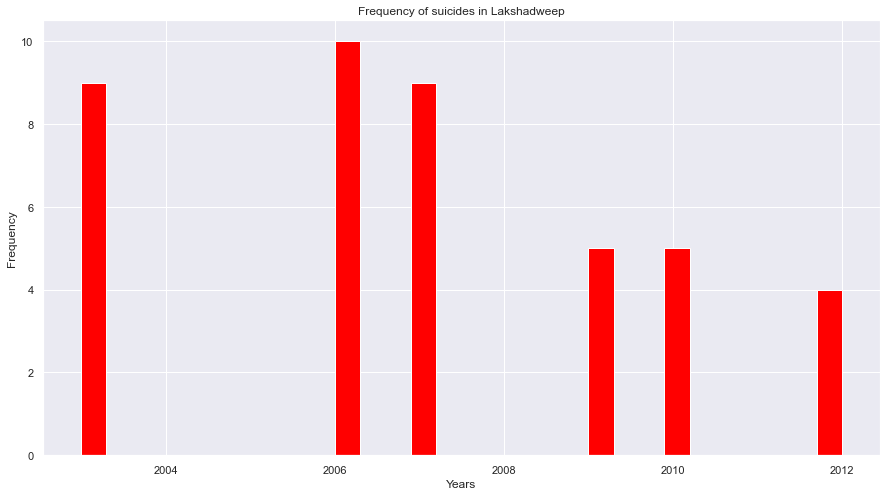

In [91]:
states=df.groupby('State')
lak=states.get_group('Lakshadweep')

lak.Year.plot(kind='hist',bins=30,figsize=(15,8),color="red")
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of suicides in Lakshadweep')
plt.show()

Analyzing the states having high rate for suicide counts - Karnataka, Tamil Nadu, Andhra Pradesh

In [92]:
#Splitting the data as per the State
State1 = df[df['State']=='Karnataka']
State2 = df[df['State']=='Tamil Nadu']
State3 = df[df['State']=='Andhra Pradesh']

In [93]:
def plot_for_State_by_age(data):
    plt.figure(figsize=(12,6))
    data = data[['Age_group','Gender','Total']]
    edSort = data.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Age_group',y='Total',hue='Gender',data=edSort,palette='RdBu')

In [94]:
def plot_for_State_by_type(data):
    plt.figure(figsize=(12,6))
    data = data[['Type_code','Gender','Total']]
    edSort = data.groupby(['Type_code','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Type_code',y='Total',hue='Gender',data=edSort,palette='ch:2.5,-.2,dark=.3')

Karnataka

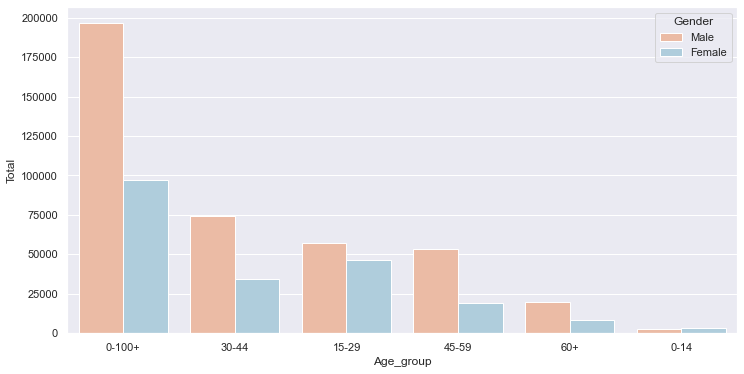

In [95]:
#plotting as per the age_group
plot_for_State_by_age(State1)

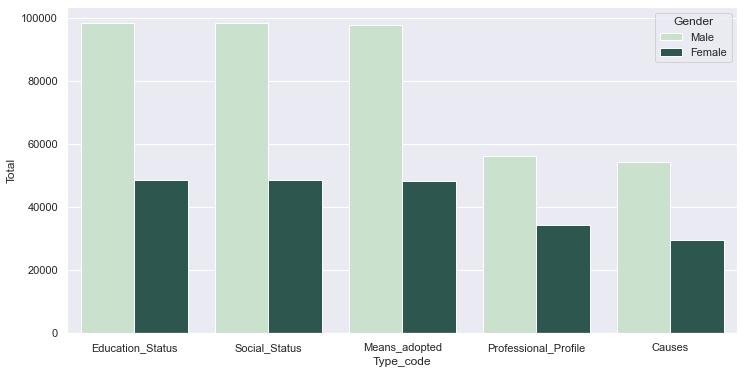

In [96]:
#plotting as per the different causes
plot_for_State_by_type(State1)

Tamil Nadu

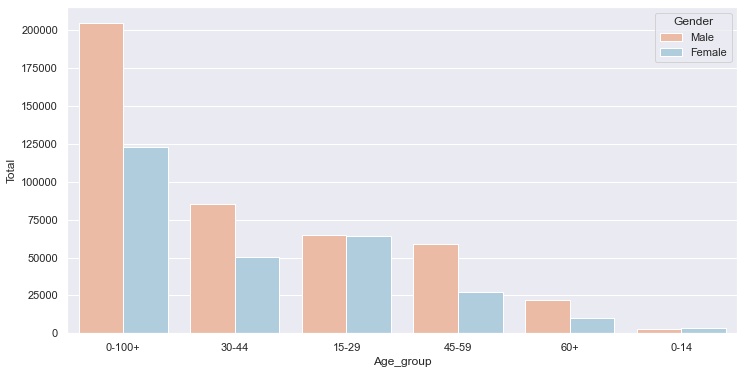

In [97]:
#plotting as per the age_group
plot_for_State_by_age(State2)

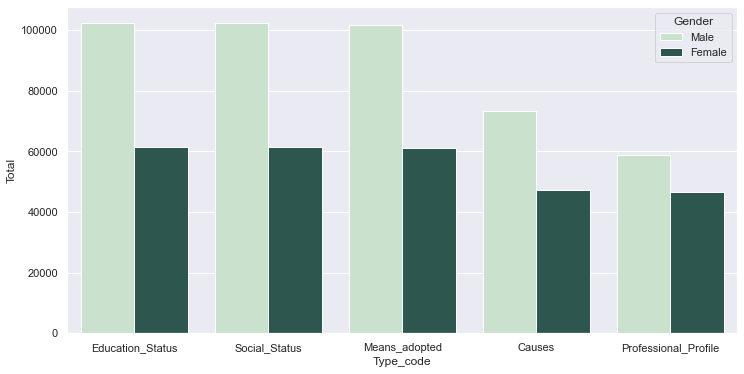

In [98]:
#plotting as per the different causes
plot_for_State_by_type(State2)

Andhra Pradesh

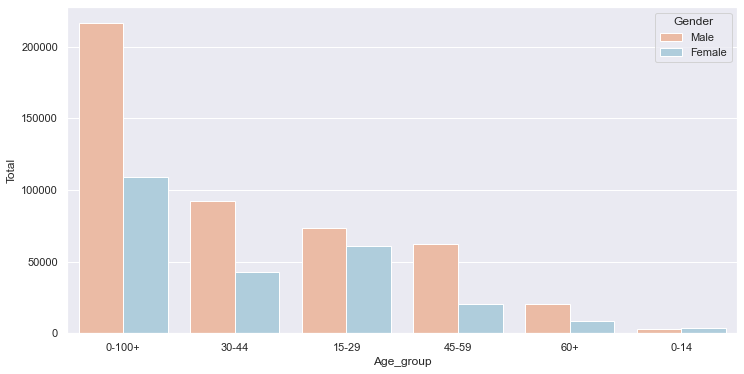

In [99]:
#plotting as per the age_group
plot_for_State_by_age(State3)

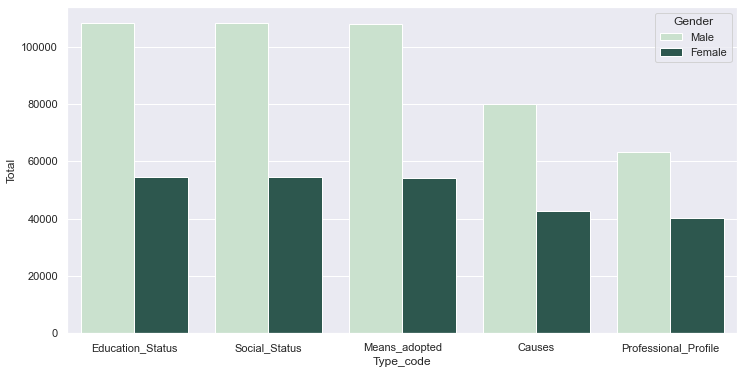

In [100]:
#plotting as per the different causes
plot_for_State_by_type(State3)

Gender

<AxesSubplot:xlabel='Gender', ylabel='Total'>

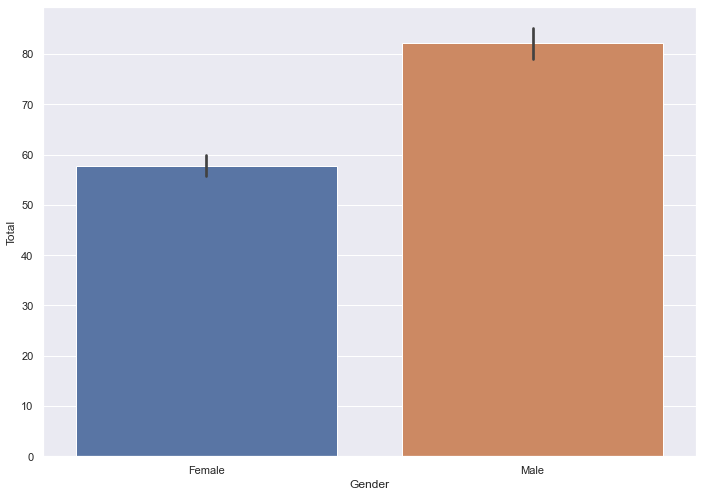

In [101]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df['Gender'], y=df['Total'])

Cumulative: 

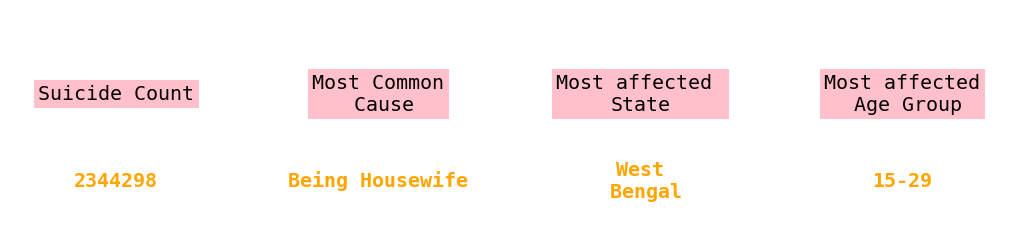

In [102]:
col = ['Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df.groupby('Gender').sum()['Total']['Female'],'Being Housewife','West\n Bengal','15-29']

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=20,
            color='black', backgroundcolor='pink')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=20, fontweight='bold',
            color='Orange', backgroundcolor='white')
    
    axes[ind].set_axis_off()

### Prediction using Naive Bayes Algorithm

In [103]:
import pandas as pd

In [104]:
age = pd.read_csv('age.csv')
age.head()

,Row Labels,Sum of Total,Probablity
0,0-14,98410,0.022695
1,15-29,1534037,0.353779
2,30-44,1471599,0.339379
3,45-59,885177,0.204139
4,60+,346925,0.080008


In [105]:
causes = pd.read_csv('causes.csv')
causes.head()

,Causes,Sum,Probablity
0,Bankruptcy or Sudden change in Economic,32755,0.002503
1,Bankruptcy or Sudden change in Economic Status,2655,0.000203
2,Cancellation/Non-Settlement of Marriage,11296,0.000863
3,Cancer,9058,0.000692
4,Causes Not known,237069,0.018113


In [106]:
gender = pd.read_csv('gender.csv')
gender.head()

,Row Labels,Sum of Total,Probablity
0,Female,4702974,0.359782
1,Male,8368760,0.640218


In [107]:
prof = pd.read_csv('profession.csv')
prof.head()

,Professional_Profile,Sum,Probablity
0,Farming/Agriculture Activity,197923,0.137519
1,House Wife,285243,0.198190
2,Others (Please Specify),469147,0.325968
3,Professional Activity,39204,0.027239
4,Public Sector Undertaking,30786,0.021390


In [108]:
social = pd.read_csv('social.csv')
prof.head()

,Professional_Profile,Sum,Probablity
0,Farming/Agriculture Activity,197923,0.137519
1,House Wife,285243,0.198190
2,Others (Please Specify),469147,0.325968
3,Professional Activity,39204,0.027239
4,Public Sector Undertaking,30786,0.021390


In [109]:
personA = {'age': '15-29', 
           'causes': 'Death of Dear Person', 
           'gender': 'Female',
           'prof': 'House Wife',
           'social': 'Widowed/Widower'}

In [110]:
personA["probablity"] = age["Probablity"][age['Row Labels'] == personA['age']].tolist()[0] * causes["Probablity"][causes['Causes'] == personA['causes']].tolist()[0] *gender["Probablity"][gender['Row Labels'] == personA['gender']].tolist()[0] *prof["Probablity"][prof['Professional_Profile'] == personA['prof']].tolist()[0] *social["Probablity"][social['Social_Status'] == personA['social']].tolist()[0] 

In [111]:
personA

{'age': '15-29',
 'causes': 'Death of Dear Person',
 'gender': 'Female',
 'prof': 'House Wife',
 'social': 'Widowed/Widower',
 'probablity': 8.48649653018369e-07}

In [112]:
personB = {'age': '45-59', 
           'causes': 'Bankruptcy or Sudden change in Economic', 
           'gender': 'Male',
           'prof': 'Public Sector Undertaking',
           'social': 'Married'}

In [113]:
personB["probablity"] = age["Probablity"][age['Row Labels'] == personB['age']].tolist()[0] * causes["Probablity"][causes['Causes'] == personB['causes']].tolist()[0] *gender["Probablity"][gender['Row Labels'] == personB['gender']].tolist()[0] *prof["Probablity"][prof['Professional_Profile'] == personB['prof']].tolist()[0] *social["Probablity"][social['Social_Status'] == personB['social']].tolist()[0] 

In [114]:
personB

{'age': '45-59',
 'causes': 'Bankruptcy or Sudden change in Economic',
 'gender': 'Male',
 'prof': 'Public Sector Undertaking',
 'social': 'Married',
 'probablity': 4.909955067174665e-06}

In [115]:
if(personA["probablity"] > personB["probablity"]): 
    print("Person A is more vulnerable")

else:
    print("Person B is more vulnerable")

Person B is more vulnerable
